## Data validation and Explanatory data analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('toyota.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [3]:
# All data types fit the descriptuion
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [4]:
# No missing data. 6738 rows and 9 columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [5]:
# NUMERIC DATA: presence of outliers in [price,	mileage,	tax,	mpg ] columns
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In [6]:
# OBJECT DATA: details about the non numeric columns
df.describe(include=object)

,model,transmission,fuelType
count,6738,6738,6738
unique,18,4,4
top,Yaris,Manual,Petrol
freq,2122,3826,4087


##### Checking Model column

In [7]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

<Axes: >

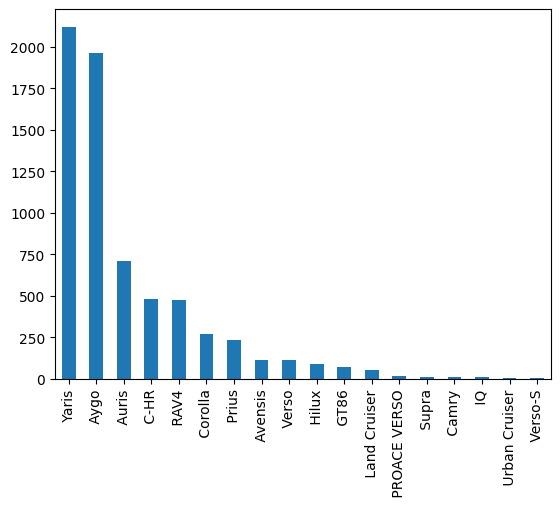

In [8]:
# Yaris is the most common model in the dataset with more than 2000 entries
df.model.value_counts().plot(kind="bar")

In [9]:
df.model.unique()

array([' GT86', ' Corolla', ' RAV4', ' Yaris', ' Auris', ' Aygo', ' C-HR',
       ' Prius', ' Avensis', ' Verso', ' Hilux', ' PROACE VERSO',
       ' Land Cruiser', ' Supra', ' Camry', ' Verso-S', ' IQ',
       ' Urban Cruiser'], dtype=object)

In [10]:
df.model.nunique()

18

##### Checking Year column

In [11]:
# year of registration from 1998 to 2020
df.year.unique()

array([2016, 2017, 2015, 2020, 2013, 2019, 2018, 2014, 2012, 2005, 2003,
       2004, 2001, 2008, 2007, 2010, 2011, 2006, 2009, 2002, 1999, 2000,
       1998])

In [12]:
df.year.value_counts()

2017    2019
2019    1286
2018    1015
2016     997
2015     525
2014     352
2013     204
2020     128
2012      42
2011      40
2009      29
2007      20
2008      19
2010      18
2005      12
2006      11
2004       7
2003       6
2002       4
2001       1
1999       1
2000       1
1998       1
Name: year, dtype: int64

In [13]:
df.year.nunique()

23

<Axes: >

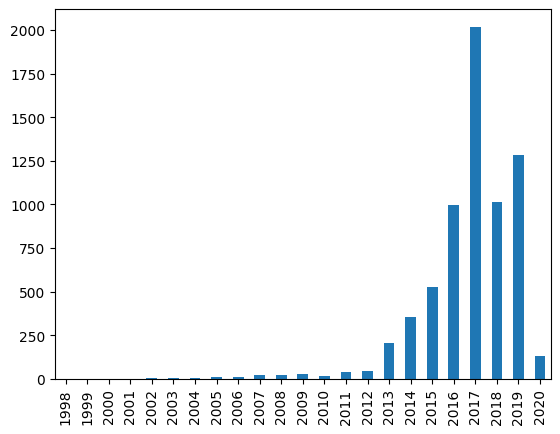

In [14]:
df.year.value_counts(ascending=True).sort_index().plot(kind="bar")
# years column spans 23 years, from 1998 to 2020. Year 2017 is the most common year of registration

#### Checking Price column

In [15]:
# Price is a contiuous value, so i will chage data type from Integer to Float
df["price"] = df["price"].astype('float')

In [16]:
price_mean = df["price"].mean()
price_median = df["price"].median()
print(price_mean, price_median)

12522.3910655981 10795.0


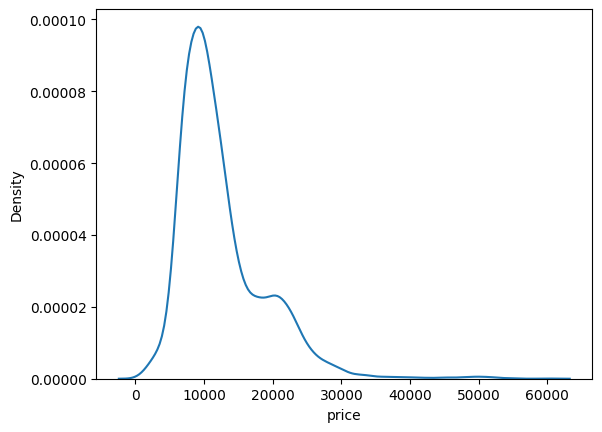

In [17]:
sns.kdeplot(df["price"])
plt.show()

##### Checking transmission column

In [18]:
df.transmission.value_counts()

Manual       3826
Automatic    2657
Semi-Auto     254
Other           1
Name: transmission, dtype: int64

In [20]:
df.transmission.value_counts(normalize=True) * 100.0

Manual       56.782428
Automatic    39.433066
Semi-Auto     3.769665
Other         0.014841
Name: transmission, dtype: float64

<Axes: >

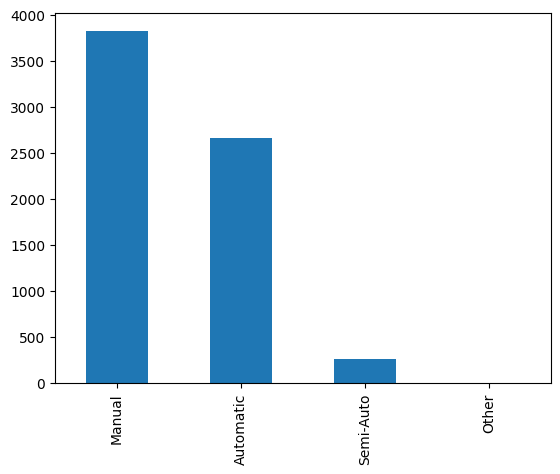

In [19]:
# Manual is the most common type of transmission. Other type should be dropped or replaced due to insigification and dimensionality reduction after one hot encoding
df.transmission.sort_values().value_counts().plot(kind="bar")

In [21]:
df.transmission = df.transmission.str.replace('Other', 'Manual')
df.transmission.value_counts()

Manual       3827
Automatic    2657
Semi-Auto     254
Name: transmission, dtype: int64

##### Checking mileage column

In [22]:
df.mileage.describe()

count      6738.000000
mean      22857.413921
std       19125.464147
min           2.000000
25%        9446.000000
50%       18513.000000
75%       31063.750000
max      174419.000000
Name: mileage, dtype: float64

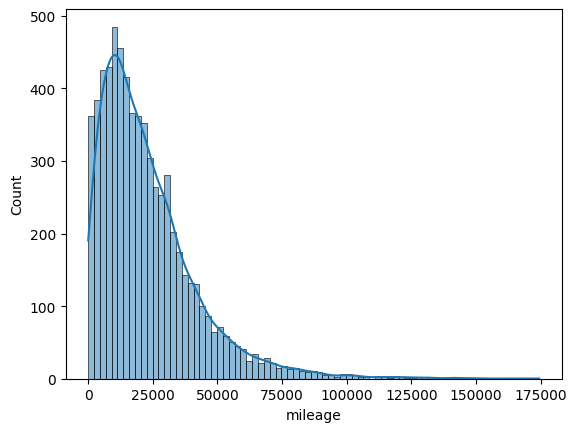

In [23]:
# Data skewed to the right
sns.histplot(df["mileage"], kde=True)
plt.show()

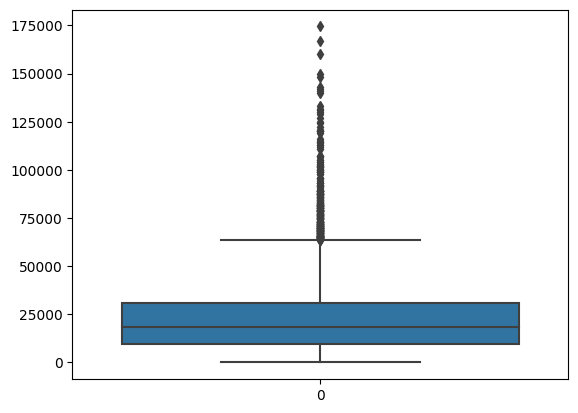

In [24]:
# Presence of outliers
sns.boxplot(df["mileage"])
plt.show()

##### Checking fuelType column

In [25]:
df.fuelType.value_counts()

Petrol    4087
Hybrid    2043
Diesel     503
Other      105
Name: fuelType, dtype: int64

In [26]:
# Petrom is the most common fuel type
df.fuelType.value_counts(normalize="True") * 100.

Petrol    60.655981
Hybrid    30.320570
Diesel     7.465123
Other      1.558326
Name: fuelType, dtype: float64

<Axes: >

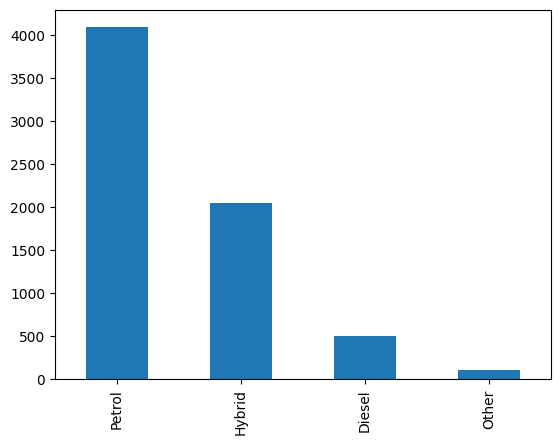

In [27]:
df.fuelType.sort_values().value_counts().plot(kind="bar")

##### Checking Tax column

In [28]:
df.tax.describe()

count    6738.000000
mean       94.697240
std        73.880776
min         0.000000
25%         0.000000
50%       135.000000
75%       145.000000
max       565.000000
Name: tax, dtype: float64

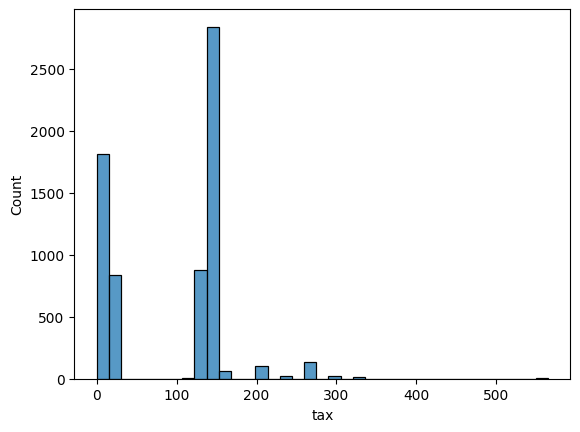

In [29]:
sns.histplot(df["tax"])
plt.show()

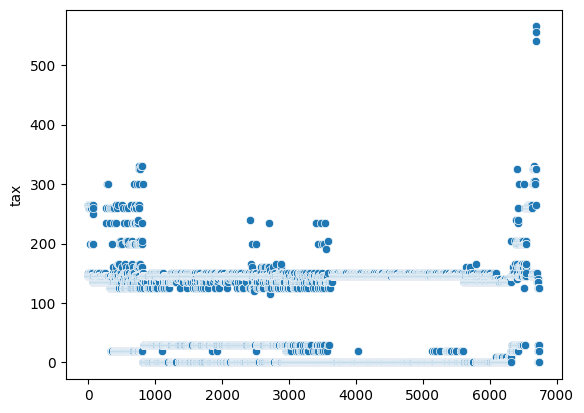

In [30]:
sns.scatterplot(df["tax"])
plt.show()

<Axes: >

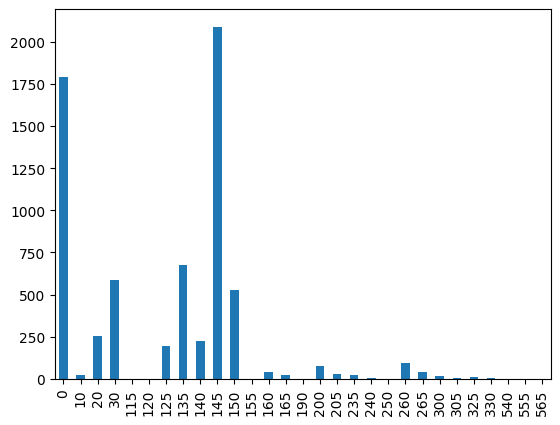

In [31]:
df.tax.value_counts().sort_index().plot(kind="bar")

##### Checking mpg column

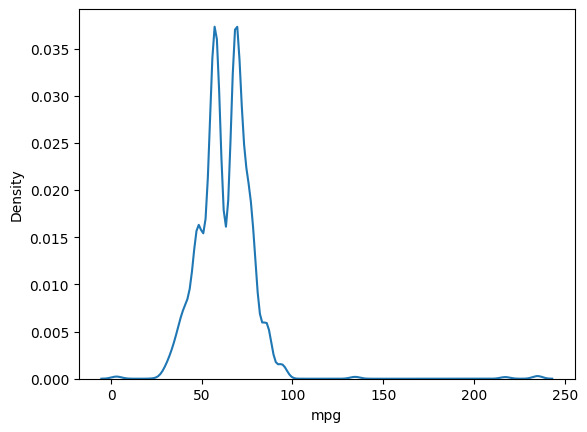

In [32]:
sns.kdeplot(df["mpg"])
plt.show()

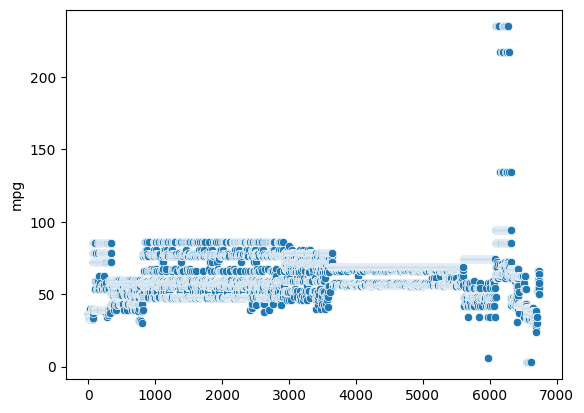

In [33]:
sns.scatterplot(df["mpg"])
plt.show()

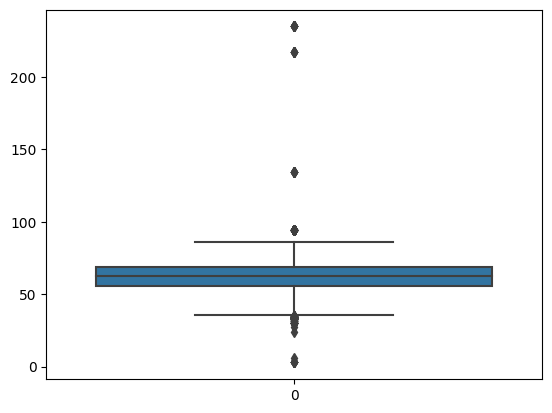

In [34]:
sns.boxplot(df["mpg"])
plt.show()

##### Checking engineSize column

In [35]:
df.engineSize.value_counts()

1.0    2059
1.5    1423
1.8    1289
1.3     601
2.0     398
1.2     303
2.5     249
1.6     169
2.4      70
2.2      58
1.4      40
2.8      36
3.0      35
0.0       6
4.2       1
4.5       1
Name: engineSize, dtype: int64

In [36]:
df.engineSize.value_counts(normalize=True) * 100.

1.0    30.558029
1.5    21.119026
1.8    19.130306
1.3     8.919561
2.0     5.906797
1.2     4.496883
2.5     3.695459
1.6     2.508163
2.4     1.038884
2.2     0.860790
1.4     0.593648
2.8     0.534283
3.0     0.519442
0.0     0.089047
4.2     0.014841
4.5     0.014841
Name: engineSize, dtype: float64

<Axes: >

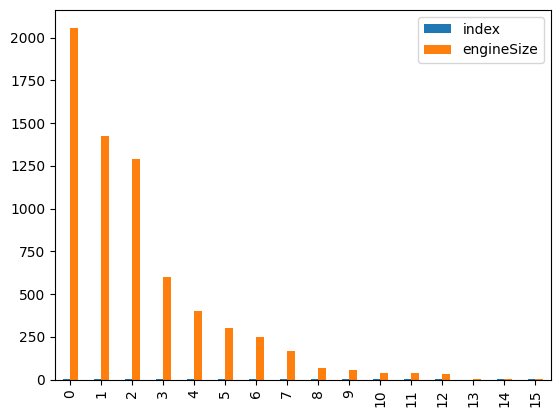

In [37]:
df.engineSize.value_counts().reset_index().plot(kind="bar")

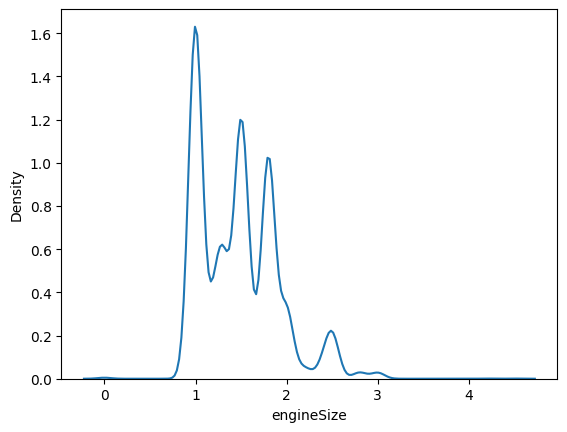

In [38]:
sns.kdeplot(df["engineSize"])
plt.show()

## Data Visualization

#### Uncovering correlations within the dataset

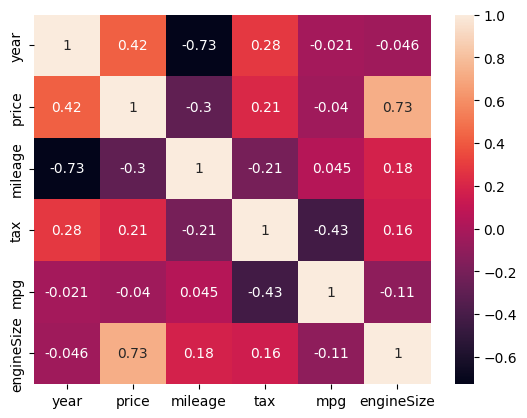

In [39]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

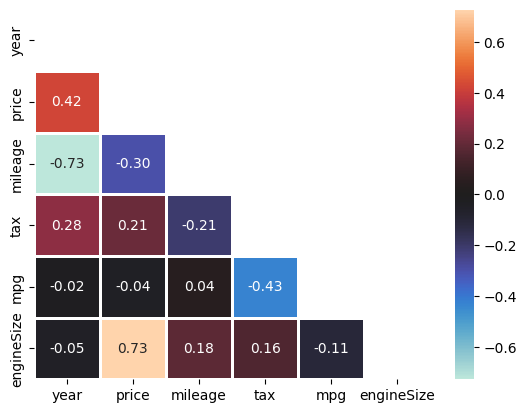

In [40]:
# Create the correlation matrix
corr = df.corr(numeric_only=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()


#### Price and enginesize are strongly correlated while year and mileage are negatively correlated

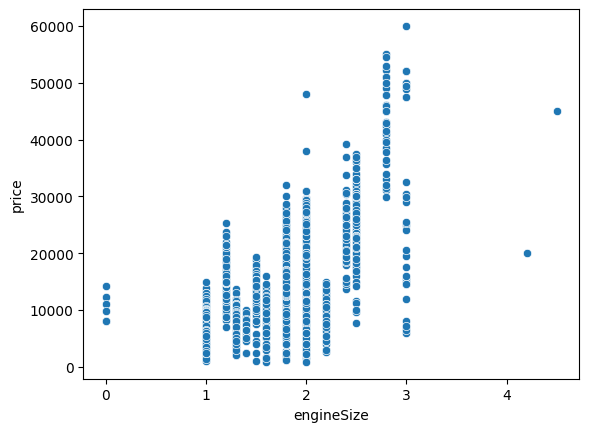

In [41]:
sns.scatterplot(data=df, x="engineSize", y="price")
plt.show()

#### The strong negative correlation between year and mileage, is because new vehicles usually have lower mileage than older vehicles.

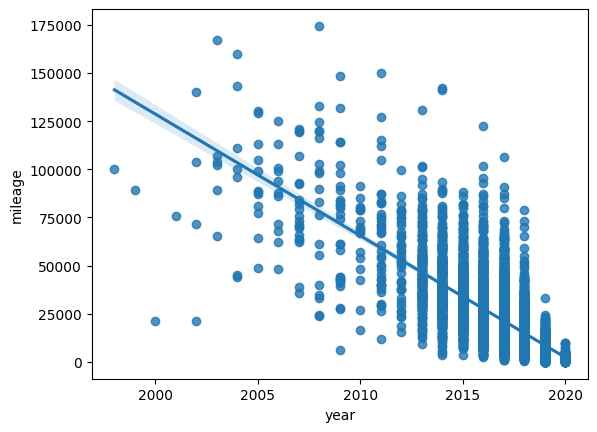

In [42]:
sns.regplot(data=df, x="year", y="mileage")
plt.show()

#### Dealing with outliers:
Some columns in the data contain outliers which is leading to skewness in the data.
There are two approach to dealing with outliers:
- first dropping outliers entirely and risk losing information.
- replace outliers with NaN values before imputing them on the mean.
This will depend on the number of outlier values and the percentage of the data they represent.

## Machine Learning Model Development including:
##### What type of problem this is ?
This is a regression problem, since we are trying to build a model that will predict a continuous variable. In this case, Price is the target variable.

#### Next step is to prepare the data so it meets Sci-kit learn API requirements before feeding the processed data into our models

#### Dealing with outliers

In [43]:
# Number of rows  in the original dataframe
df.shape[0]

6738

<Axes: >

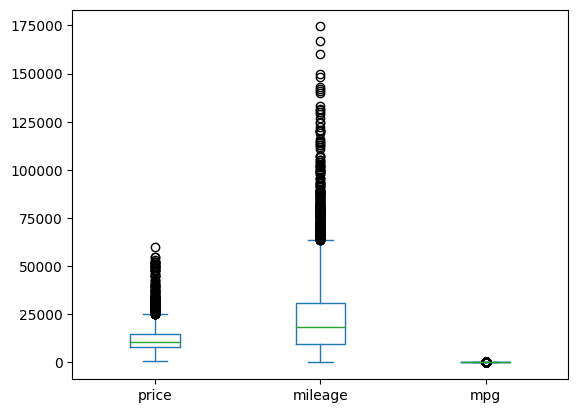

In [44]:
# Columns that seem to contain outlier values
cols = ["price", "mileage", "mpg"]
df[cols].plot(kind='box')

#### I will NOT drop the outlier values, instead i will turn them into np.nans then impute the np.nans with the mean value.
in order to avoid information lose and to compare performace with earlier model which just dropped the np.nans

In [89]:
"""
def remove_outliers_updated(df, cols):
    # Copy the original DataFrame to avoid modifying it
    df_copy = df.copy()

    # Loop through each column and replace outliers with NaN values
    for col in cols:
        q1 = df_copy[col].quantile(0.25)
        q3 = df_copy[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df_copy.loc[(df_copy[col] < lower_bound) | (df_copy[col] > upper_bound), col] = np.nan

    # Return the DataFrame with outliers replaced by NaN values
    return df_copy
"""

'\ndef remove_outliers_updated(df, cols):\n    # Copy the original DataFrame to avoid modifying it\n    df_copy = df.copy()\n    \n    # Loop through each column and replace outliers with NaN values\n    for col in cols:\n        q1 = df_copy[col].quantile(0.25)\n        q3 = df_copy[col].quantile(0.75)\n        iqr = q3 - q1\n        lower_bound = q1 - 1.5 * iqr\n        upper_bound = q3 + 1.5 * iqr\n        df_copy.loc[(df_copy[col] < lower_bound) | (df_copy[col] > upper_bound), col] = np.nan\n    \n    # Return the DataFrame with outliers replaced by NaN values\n    return df_copy\n'

#### After dropping outliers we lost 640 rows which is 10 percent of the original data set.
##### P.S: Might change the approach later.

In [91]:
"""
df_trimmed = remove_outliers_updated(df, cols)
df_trimmed.shape[0]
"""

'\ndf_trimmed = remove_outliers_updated(df, cols)\ndf_trimmed.shape[0]\n'

In [93]:
"""
df_trimmed.describe()
"""

'\ndf_trimmed.describe()\n'

In [94]:
"""
cols = ["price", "mileage", "mpg"]
df_trimmed[cols].plot(kind='box')
"""

'\ncols = ["price", "mileage", "mpg"]\ndf_trimmed[cols].plot(kind=\'box\')\n'

In [49]:
#df = df_trimmed

#### Features Engineering

In [45]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000.0,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995.0,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998.0,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998.0,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498.0,Manual,36284,Petrol,145,36.2,2.0


#### I'm going to use the year column to create a new column called age, which will represent the current year of 2023 minus the year of registeration.

In [46]:
df["age"] = 2023 - df["year"]
df["age"]

0        7
1        6
2        8
3        6
4        6
        ..
6733    12
6734    12
6735    11
6736    12
6737    12
Name: age, Length: 6738, dtype: int64

#### I'm going to label the category variables using get_dummies without considering reducing model dimentions just yet.

In [52]:
#model_label = pd.get_dummies(df["model"], drop_first=True)
#model_label.head()

In [53]:
#year_label = pd.get_dummies(df["year"], drop_first=True)
#year_label.head()

In [47]:
trans_label = pd.get_dummies(df["transmission"], drop_first=True)
trans_label.head()

,Manual,Semi-Auto
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [48]:
fuel_label = pd.get_dummies(df["fuelType"], drop_first=True)
fuel_label.head()

,Hybrid,Other,Petrol
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [49]:
num_df = df.drop(["model", "year", "transmission", "fuelType"], axis=1)
num_df.head()

,price,mileage,tax,mpg,engineSize,age
0,16000.0,24089,265,36.2,2.0,7
1,15995.0,18615,145,36.2,2.0,6
2,13998.0,27469,265,36.2,2.0,8
3,18998.0,14736,150,36.2,2.0,6
4,17498.0,36284,145,36.2,2.0,6


#### Impute the missing values using the mean

In [57]:
"""
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy="mean")
imp_df = imp.fit_transform(num_df)
imp_df = pd.DataFrame(imp_df, columns=num_df.columns)
imp_df.head()
"""

,price,mileage,tax,mpg,engineSize,age
0,16000.0,24089.0,265.0,36.2,2.0,7.0
1,15995.0,18615.0,145.0,36.2,2.0,6.0
2,13998.0,27469.0,265.0,36.2,2.0,8.0
3,18998.0,14736.0,150.0,36.2,2.0,6.0
4,17498.0,36284.0,145.0,36.2,2.0,6.0


#### Putting the columns together to create a new data frame

In [53]:
# Replace num_df with imp_df
ml_df = pd.concat([num_df, fuel_label, trans_label], axis=1)
ml_df.head()

,price,mileage,tax,mpg,engineSize,age,Hybrid,Other,Petrol,Manual,Semi-Auto
0,16000.0,24089,265,36.2,2.0,7,0,0,1,1,0
1,15995.0,18615,145,36.2,2.0,6,0,0,1,1,0
2,13998.0,27469,265,36.2,2.0,8,0,0,1,1,0
3,18998.0,14736,150,36.2,2.0,6,0,0,1,1,0
4,17498.0,36284,145,36.2,2.0,6,0,0,1,1,0


In [52]:
print(ml_df.shape)

(6738, 11)


#### Defining the Features as X and target as y

In [54]:
X = ml_df.drop('price', axis=1)
y = ml_df["price"]
print(X.shape, y.shape)

(6738, 10) (6738,)


#### Time to split the data into training and test sets to avoid over fitting and evaluate model performance on unseen data

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.size, X_test.size, y_train.size, y_test.size)

50530 16850 5053 1685


In [56]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA

#### Tree Model

In [57]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [58]:
X.columns = X.columns.astype(str)
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

## First Attempt with DecisionTreeRegressor:
This initial model i used data that contained nans for outliers and then imputed using the SimplerImputer. The problem is that then i applied StandardScaler which removes the mean and scales the data to have unit variance.
The result was good but not amazing.

In [78]:
# Setting random seed
np.random.seed(402)

# Define the parameter grid for hyperparameter tuning
param_grid = {'dtr__max_depth': range(1, 20),
              'dtr__min_samples_split': range(2, 20),
              'dtr__min_samples_leaf': range(1, 10),
              'dtr__max_features': ['sqrt', 'log2', None],
              'dtr__ccp_alpha': [0, 0.01, 0.05, 0.1]}

# Create a DecisionTreeRegressor object
dtr = DecisionTreeRegressor(random_state=42)


# Defining pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('dtr', dtr)])

# Use GridSearchCV to find the best hyperparameters
grid_search = RandomizedSearchCV(pipe, param_grid, cv=5, error_score='raise', scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# Train the model with the best hyperparameters
best_dtr = grid_search.best_estimator_

# Use cross-validation to evaluate the model performance
cv_scores = -1 * cross_val_score(best_dtr, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('Cross-validation RMSE:', cv_scores.mean())

# Use the trained model to make predictions
y_pred_dtr_1st = best_dtr.predict(X_test)

# Calculate the RMSE of the predictions
rmse = mean_squared_error(y_test, y_pred_dtr_1st, squared=False)
print('Training set RMSE:', rmse)

# calculate the score of the training set
score = best_dtr.score(X_train, y_train)
print('Training score:', score)

Best hyperparameters: {'dtr__min_samples_split': 12, 'dtr__min_samples_leaf': 8, 'dtr__max_features': None, 'dtr__max_depth': 19, 'dtr__ccp_alpha': 0.01}
Cross-validation RMSE: 3291703.215866135
Training set RMSE: 1901.3828747543455
Training score: 0.9135606128017463


In [79]:
print(np.mean(y_pred_dtr_1st), np.mean(y_test))

11885.009587158736 11835.753465215957


### The second DTR model with better results:
In the model i:
Instead of removing or imputing the outliers with the mean value, i used Ribust scaler because RobustScaler uses the median and interquartile range (IQR) to scale the data, making it resistant to the influence of outliers. By using RobustScaler, the scaling is based on statistics that are robust to outliers, providing a more reliable scaling result.
The reason for this is that i seemed to get better results if i dont impute the outliers and dropping it wasn't an option since they made up 10% of the data.

In [59]:
# Setting random seed
np.random.seed(402)

# Define the parameter grid for hyperparameter tuning
param_grid = {'dtr__max_depth': range(1, 20),
              'dtr__min_samples_split': range(2, 20),
              'dtr__min_samples_leaf': range(1, 10),
              'dtr__max_features': ['sqrt', 'log2', None],
              'dtr__ccp_alpha': [0, 0.01, 0.05, 0.1]}

# Create a DecisionTreeRegressor object
dtr = DecisionTreeRegressor(random_state=42)


# Defining pipeline
pipe = Pipeline([('robust', RobustScaler(quantile_range=(25.0, 75.0), with_centering=True)), ('dtr', dtr)])

# Use GridSearchCV to find the best hyperparameters
grid_search = RandomizedSearchCV(pipe, param_grid, cv=5, error_score='raise', scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# Train the model with the best hyperparameters
best_dtr = grid_search.best_estimator_

# Use cross-validation to evaluate the model performance
cv_scores = -1 * cross_val_score(best_dtr, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('Cross-validation RMSE:', cv_scores.mean())

# Use the trained model to make predictions
y_pred_test = best_dtr.predict(X_test)

# Calculate the RMSE of the predictions
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print('Training set RMSE:', rmse)

# calculate the score of the training set
score = best_dtr.score(X_train, y_train)
print('Training score:', score)

Best hyperparameters: {'dtr__min_samples_split': 6, 'dtr__min_samples_leaf': 4, 'dtr__max_features': None, 'dtr__max_depth': 14, 'dtr__ccp_alpha': 0.01}
Cross-validation RMSE: 2223488.298534547
Training set RMSE: 1492.8769648054547
Training score: 0.9747606525760145


In [61]:
# Predicted Value mean and True value mean
print(np.mean(y_pred_test), np.mean(y_test))

12654.669740858273 12652.94362017804


In [62]:
# RMSE and True value Range
print(mean_squared_error(y_test, y_pred_test, squared=False), np.max(y_test) - np.min(y_test))

1492.8769648054547 50045.0


################################################### TEST #######################################

## Ploting feature importance
It seems like the DTR model 90% of model relevance or contribution is done by mostly 5 columns, which suggests i should drop the model encoded column and run the model again.

In [70]:
regressor = best_dtr.named_steps["dtr"]
feature_importance = regressor.feature_importances_

In [71]:
from sklearn.tree import export_graphviz
import graphviz

In [72]:
# Visualize the decision tree using graphviz
dot_data = export_graphviz(regressor, out_file=None, feature_names=X.columns,
                           filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('decision_tree')  # Save the visualization to a file (optional)
graph.view()  # Open the visualization in the default PDF viewer

'decision_tree.pdf'

In [77]:
# Calculate cumulative variance explained
cumulative_variance = np.cumsum(feature_importance)

# Find the number of features that explain 90% variance
num_features_90_variance = np.argmax(cumulative_variance >= 0.90) + 1

# Replace these with your actual feature names
feature_names = X.columns

# Extract the top features
top_features_indices = np.argsort(feature_importance)[::-1][:num_features_90_variance]

# Print selected feature names and their importances
print("Selected Features and Their Importances:")
for idx in top_features_indices:
    print(f"{feature_names[idx]}: Importance - {feature_importance[idx]:.4f}")

Selected Features and Their Importances:
engineSize: Importance - 0.5859
age: Importance - 0.2796
mpg: Importance - 0.0648
mileage: Importance - 0.0327
tax: Importance - 0.0171


In [78]:
feature_names = X.columns

# Iterate through columns and print feature importance
print("Feature Importance:")
for feature_name, importance in zip(feature_names, feature_importance):
    print(f"{feature_name}: {importance:.4f}")

Feature Importance:
mileage: 0.0327
tax: 0.0171
mpg: 0.0648
engineSize: 0.5859
age: 0.2796
Hybrid: 0.0002
Other: 0.0008
Petrol: 0.0001
Manual: 0.0109
Semi-Auto: 0.0081


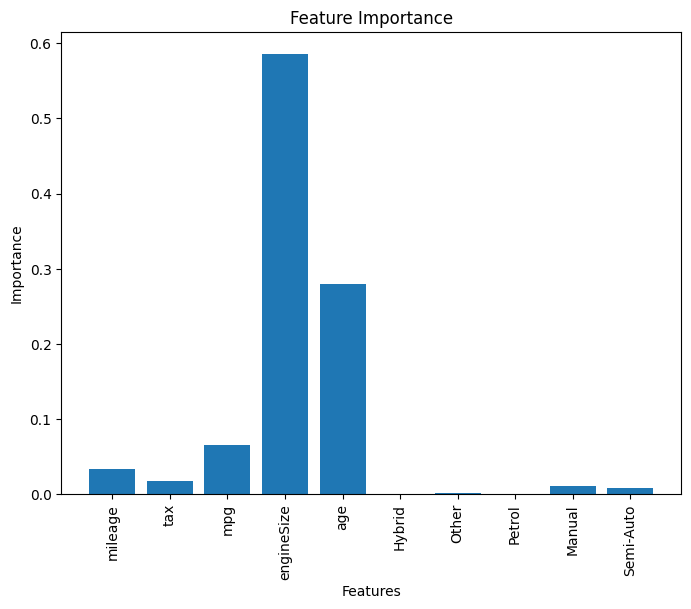

In [79]:
plt.figure(figsize=(8, 6))
plt.bar(range(X.shape[1]), feature_importance, tick_label=X.columns)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()

#### First Attempt at Gradiant boost Regressor
This model uses the same data configuration as the initial DTR mode, with outliers being imputed using SimpleImputer and Then scaled using StandardScaler.
The results are better than the inital DTR model but worse than the results of the improved DTR model. Still the result of this model is good.

In [73]:
X.columns = X.columns.astype(str)
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [67]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import randint as sp_randint


In [82]:
# SETTING A SEED
np.random.seed(42)

# Define the parameter distributions for hyperparameter tuning
param_dist = {'gbr__n_estimators': sp_randint(50, 500),
              'gbr__learning_rate': [0.001, 0.01, 0.1, 0.5, 1],
              'gbr__max_depth': sp_randint(3, 10),
              'gbr__min_samples_split': sp_randint(2, 10),
              'gbr__min_samples_leaf': sp_randint(1, 5),
              'gbr__max_features': ['sqrt', 'log2', None]}

# Create a GradientBoostingRegressor object
gbr = GradientBoostingRegressor(random_state=42)


# Defining pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('gbr', gbr)])

# Use RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(pipe, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print('Best hyperparameters:', random_search.best_params_)

# Train the model with the best hyperparameters
best_gbr = random_search.best_estimator_

# Use cross-validation to evaluate the model performance
cv_scores = -1 * cross_val_score(best_gbr, X_train, y_train, cv=10, scoring='neg_mean_squared_error', verbose=1)
print('Cross-validation RMSE:', cv_scores.mean())

# Use the trained model to make predictions
y_pred_gbr_1st = best_gbr.predict(X_test)

# Calculate the RMSE of the predictions
rmse = mean_squared_error(y_test, y_pred_gbr_1st, squared=False)
print('Training set RMSE:', rmse)

# score
print('gbr score:', best_gbr.score(X_train, y_train))

Best hyperparameters: {'gbr__learning_rate': 0.1, 'gbr__max_depth': 5, 'gbr__max_features': 'sqrt', 'gbr__min_samples_leaf': 3, 'gbr__min_samples_split': 6, 'gbr__n_estimators': 280}
Cross-validation RMSE: 2417274.6485051047
Training set RMSE: 1595.2160859008022
gbr score: 0.947809070764106


In [88]:
print(np.mean(y_pred_gbr_1st), np.mean(y_test))

11903.668437489128 11835.753465215957


## Improved GBR model:
This model uses the same data used on the second DTR model. Data that contains outliers which were the passed on to a pipeline containing RobustScaler.
The results is amawing model with low RMSE and high score.

In [68]:
# SETTING A SEED
np.random.seed(42)

# Define the parameter distributions for hyperparameter tuning
param_dist = {'gbr__n_estimators': sp_randint(50, 500),
              'gbr__learning_rate': [0.001, 0.01, 0.1, 0.5, 1],
              'gbr__max_depth': sp_randint(3, 10),
              'gbr__min_samples_split': sp_randint(2, 10),
              'gbr__min_samples_leaf': sp_randint(1, 5),
              'gbr__max_features': ['sqrt', 'log2', None]}

# Create a GradientBoostingRegressor object
gbr = GradientBoostingRegressor(random_state=42)


# Defining pipeline
pipe = Pipeline([('robust', RobustScaler(quantile_range=(25.0, 75.0), with_centering=True)), ('gbr', gbr)])

# Use RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(pipe, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print('Best hyperparameters:', random_search.best_params_)

# Train the model with the best hyperparameters
best_gbr = random_search.best_estimator_

# Use cross-validation to evaluate the model performance
cv_scores = -1 * cross_val_score(best_gbr, X_train, y_train, cv=10, scoring='neg_mean_squared_error', verbose=1)
print('Cross-validation RMSE:', cv_scores.mean())

# Use the trained model to make predictions
y_pred_gbr_test = best_gbr.predict(X_test)

# Calculate the RMSE of the predictions
rmse = mean_squared_error(y_test, y_pred_gbr_test, squared=False)
print('Training set RMSE:', rmse)

# score
print('gbr score:', best_gbr.score(X_train, y_train))

Best hyperparameters: {'gbr__learning_rate': 0.1, 'gbr__max_depth': 8, 'gbr__max_features': 'log2', 'gbr__min_samples_leaf': 2, 'gbr__min_samples_split': 6, 'gbr__n_estimators': 111}
Cross-validation RMSE: 1580782.169484356
Training set RMSE: 1191.2712427664185
gbr score: 0.9868243440310155


In [69]:
print(np.mean(y_pred_gbr_test), np.mean(y_test))

12647.333987957814 12652.94362017804


In [88]:
print(X_test.shape, y_test.shape)

(1685, 10) (1685,)


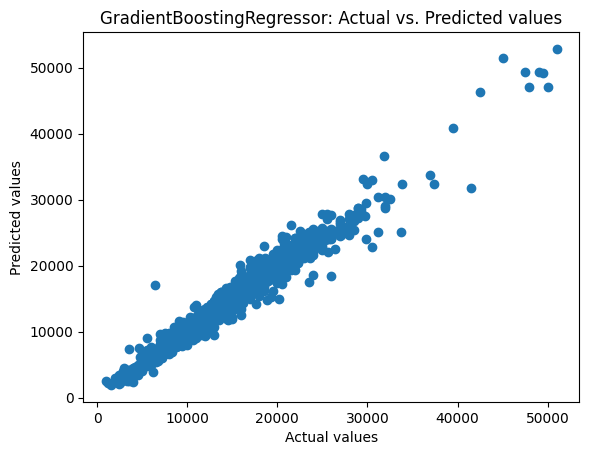

In [80]:
# Plot the predicted vs. actual values
plt.scatter(y_test, y_pred_gbr_test)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("GradientBoostingRegressor: Actual vs. Predicted values")
plt.show()

## Interperting Results:

In order to interpert results i will be using 3 different approaches and i will explain why for each.

**Root Mean Squared Error (RMSE):**

Interpretation: RMSE is a measure of the average magnitude of the errors between predicted and actual values. It quantifies how well your regression model's predictions match the actual target values.

*RMSE Interpretation Guidelines:*

* A lower RMSE indicates better model performance. Lower values mean the model's predictions are closer to the actual values.
* Compare the RMSE to the range of the target values to understand the scale of the error relative to the variability in the data. range refers to the difference bewteen the max and min value.

**Mean of Target Values:**

Interpretation: The mean of the actual target values gives you an idea of the central tendency of the target variable.

Mean Interpretation Guidelines:
Compare the mean of the predicted values to the mean of the actual values. If they are close, it suggests that the model captures the overall trend of the data.

**Range of Target Values:**

Interpretation: The range of the actual target values reflects the spread or variability of the target variable.

*Interpretation Guidelines:*
Compare the RMSE to the range of the target values. If the RMSE is significantly smaller than the range, it indicates that the model's errors are relatively small compared to the variability in the data.

**THE RESULTS:**
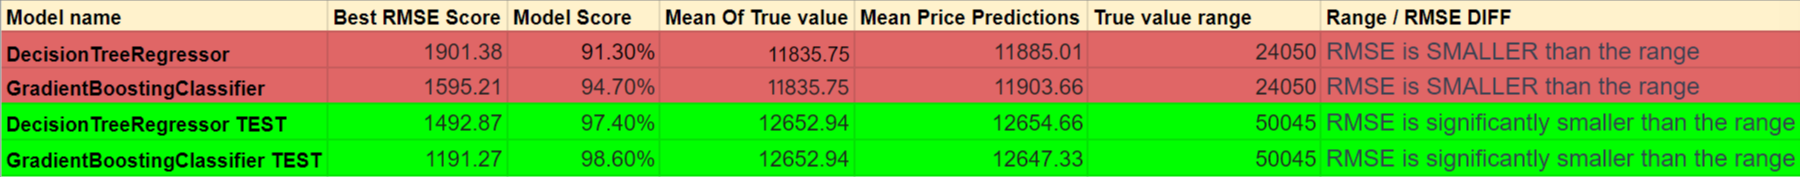

## Conclusion:

During the first part of this project, i made a lot of mistakes that needed to be corrected to avoid overfitting and in order increase model efficiency. Some of the are:
1. Using the year column as a category with each year having its own column in the ml_df. That lead to increased model dimentionality and search space. Despite the year columns having little to no contribution to model performance.
2. Using the model column was also mistake, since most model had low values associted with then and little to no contribution to model performance. With the expection of the helix model. This increased The model dimentionality and lower model efficiency.
3. Not paying close attention to feature engineering. Extracting the age column from the year column was a good idea, since it had more contribution for the model that all of the years columns combined. at the cost of one extra numeric column.
4. Imputing outliers was another mistake that cost me a lot of time and model performance, since later on i applied scaling on the data any way.
5. Not using robustscaler sooner. robustscaler is better at handing outliers in a data set than standardscaler and the results in both second stage model shows that.



#### As you can see the GradiantBoostRegressor RMSE is much smaller than the Mean and Median value of the target Variable. So it is safe to assume it is the better model here.

## Further Considerations:
#### 1. The model contains a lot of dimensions with low to no added value to model accuracy. Those features if removed, would reduce model complexity and increase model effiecency. => DONE!

#### 2. Try out different regularization methods besides the StandardScaler. => DONE!

#### 3. Instead of removing Outliers try to impute them using the mean or median value. => CORRECTED!

#### 4. Try different approaches like RandomForestRegressor and XGB.

#### 5. Remove the model column and the encoded columns associeted with it since they have low to no contribution to model performance yet increase model dimentionality. => DONE!

#### 6. create a new column that uses engine size to infere the vehivle type and put it in different categories. like Sadan, SUV, Sports car.
